## Noisy Density Matrix Simulation

In [1]:
from jaqalpaq.parser import parse_jaqal_string
from jaqalpaq.emulator import run_jaqal_circuit
from jaqalpaq.core.result import parse_jaqal_output_list

In [2]:
pi = 3.1415926535897932
def simple_jaqal_circuit(angle):
    return parse_jaqal_string(f"""
                                from qscout.v1.std usepulses *

                                register q[2]

                                let angle {angle}

                                loop 1 {{
                                prepare_all
                                R q[0] 0 angle
                                measure_all
                                }}

                                """)

In [3]:
import numpy as np
angles = np.linspace(0, 2*np.pi, 21)
#grid_angles = np.linspace(np.pi/20, np.pi + np.pi/20, 5)
grid_angles = np.linspace(0, np.pi, 3)

In [4]:
# from qscout.v1.noisy import SNLToy1
from qscout.v1.ionsim import IonSimErrorModel
from qscout.v1.ionsim_data.ion_interpolator_spline import SingleQubitTargetOp, MSTargetOp, adjust_time
# need to change "create opfactory method" of interpygate to make calls to
# self.TargetOpFactory, not __main__.TargetOpFacotry

In [5]:
# jaqal_results_exact = []
# grid_jaqal_results_exact = []
# for angle in angles:
#     result = run_jaqal_circuit(simple_jaqal_circuit(angle))
#     jaqal_results_exact += [result]
#     if angle in grid_angles:
#         grid_jaqal_results_exact += [result]

In [6]:
# jaqal_results_toy = []
# for angle in angles:
#     jaqal_results_toy += [run_jaqal_circuit(simple_jaqal_circuit(angle), backend=SNLToy1(2, depolarization=1e-3))]

In [7]:
jaqal_results_ion = {}
grid_jaqal_results_ion = {}
sigmas = [0]
for sigma in sigmas:
    jaqal_results_ion[sigma] = []
    grid_jaqal_results_ion[sigma] = []
    for angle in angles:
        result = run_jaqal_circuit(simple_jaqal_circuit(angle), backend=IonSimErrorModel(2, v0=[0, 0], sigmas=[sigma, 0], sample=False, datadir='Omega1-time'))
        jaqal_results_ion[sigma] += [result]
        if angle in grid_angles:
            grid_jaqal_results_ion[sigma] += [result]        

... computing R gate... phi, theta =  0.0 3.141592653589793
... computing R gate... phi, theta =  4.934802200544679 3.141592653589793
... computing R gate... phi, theta =  0.0 1.5707963267948966
... computing R gate... phi, theta =  4.934802200544679 1.5707963267948966
... computing R gate... phi, theta =  3.5864190939097718 1.5707963267948966
... computing R gate... phi, theta =  2.2380359872748645 1.5707963267948966
... computing MS gate... phi, theta =  0.0 1.5707963267948966
... computing R gate... phi, theta =  0.0 0
... computing R gate... phi, theta =  0.0 3.141592653589793
... computing R gate... phi, theta =  4.934802200544679 3.141592653589793
... computing R gate... phi, theta =  0.0 1.5707963267948966
... computing R gate... phi, theta =  4.934802200544679 1.5707963267948966
... computing R gate... phi, theta =  3.5864190939097718 1.5707963267948966
... computing R gate... phi, theta =  2.2380359872748645 1.5707963267948966
... computing MS gate... phi, theta =  0.0 1.57079

... computing R gate... phi, theta =  3.5864190939097718 1.5707963267948966
... computing R gate... phi, theta =  0.0 3.141592653589793
... computing R gate... phi, theta =  4.934802200544679 3.141592653589793
... computing R gate... phi, theta =  0.0 1.5707963267948966
... computing R gate... phi, theta =  4.934802200544679 1.5707963267948966
... computing R gate... phi, theta =  3.5864190939097718 1.5707963267948966
... computing R gate... phi, theta =  2.2380359872748645 1.5707963267948966
... computing MS gate... phi, theta =  0.0 1.5707963267948966
... computing R gate... phi, theta =  3.5864190939097718 1.2566370614359172
... computing R gate... phi, theta =  0.0 3.141592653589793
... computing R gate... phi, theta =  4.934802200544679 3.141592653589793
... computing R gate... phi, theta =  0.0 1.5707963267948966
... computing R gate... phi, theta =  4.934802200544679 1.5707963267948966
... computing R gate... phi, theta =  3.5864190939097718 1.5707963267948966
... computing R ga

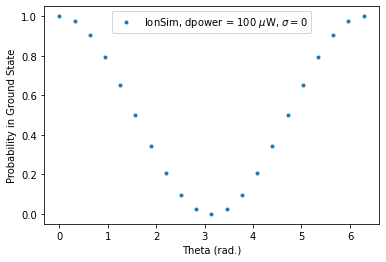

In [8]:
save = False
datadir = '/Users/bruzic/Documents/Projects/Qscout/emulations/plots'

import matplotlib
from matplotlib import cm
from matplotlib import pyplot as plt
from numpy import bincount


sigma = 0
index = 0
# ys_exact = np.array([result.subcircuits[0].probability_by_int[index] for result in jaqal_results_exact ])
# grid_ys_exact = np.array([result.subcircuits[0].probability_by_int[index] for result in grid_jaqal_results_exact ])
# ys_toy = np.array([result.subcircuits[0].probability_by_int[index] for result in jaqal_results_toy ])
ys_ion = np.array([result.subcircuits[0].probability_by_int[index] for result in jaqal_results_ion[sigma]])
grid_ys_ion = np.array([result.subcircuits[0].probability_by_int[index] for result in grid_jaqal_results_ion[sigma]])


# plt.plot(angles, ys_exact, label='ideal')
# plt.plot(angles, ys_toy, '--', label='Toy, depolarization = 0.01%')
plt.plot(np.array(angles), ys_ion, '.', label=r'IonSim, dpower = 100 $\mu$W, $\sigma=$' + f'{sigma}')
plt.legend()
plt.ylabel('Probability in Ground State')
plt.xlabel(r'Theta (rad.)')

if save:
    plt.savefig(f'{datadir}/R_gate_probability_vs_theta.pdf', bbox_inches='tight')
plt.show()

In [ ]:
grid_angles

In [ ]:
grid_jaqal_results_ion

In [ ]:
save = False
datadir = '/Users/bruzic/Documents/Projects/Qscout/emulations/plots'

import matplotlib
from matplotlib import cm
from matplotlib import pyplot as plt
from numpy import bincount

for index in range(1):
    ys_exact = np.array([result.subcircuits[0].probability_by_int[index] for result in jaqal_results_exact])
    grid_ys_exact = np.array([result.subcircuits[0].probability_by_int[index] for result in grid_jaqal_results_exact])
    
    ys_toy = np.array([result.subcircuits[0].probability_by_int[index] for result in jaqal_results_toy])
    
    # plt.plot(angles, ys_toy-ys_exact, '-', label='Toy, depolarization = 0.1%')
    colors = cm.YlOrBr(np.linspace(0.3, 1, len(sigmas)))[::-1]
    for i, sigma in enumerate(sigmas[::-1]):
        ys_ion = np.array([result.subcircuits[0].probability_by_int[index] for result in jaqal_results_ion[sigma]])
        plt.plot(np.array(angles), ys_ion-ys_exact, '-', label=r'IonSim, dpower=10 $\mu$W, $\sigma=$'+ f'{int(np.round(1e6*sigma))}' + r' $\mu$W', color=colors[i])
        grid_ys_ion = np.array([result.subcircuits[0].probability_by_int[index] for result in grid_jaqal_results_ion[sigma]])
        plt.plot(np.array(grid_angles), grid_ys_ion-grid_ys_exact, 'o', label=r'IonSim, dpower=10 $\mu$W, $\sigma=$'+ f'{int(np.round(1e6*sigma))}' + r' $\mu$W', color=colors[i])
    
    plt.legend(loc="upper right", bbox_to_anchor=(1.75, 1.0))
    plt.ylabel('Error')
    plt.xlabel(r'Theta (rad.)')
    if save:
        plt.savefig(f'{datadir}/R_gate_error_vs_theta.pdf', bbox_inches='tight')
    plt.show()

In [ ]:
import matplotlib
from matplotlib import pyplot as plt
from numpy import bincount
for index in range(4):
    ys_exact = np.array([result.subcircuits[0].probability_by_int[index] for result in jaqal_results_exact ])
    ys_toy = np.array([result.subcircuits[0].probability_by_int[index] for result in jaqal_results_toy ])
    
    # plt.plot(angles, ys_exact-ys_exact)
    plt.plot(angles, ys_toy-ys_exact, '--', label='toy')
    for sigma in sigmas:
        ys_ion = np.array([result.subcircuits[0].probability_by_int[index] for result in jaqal_results_ion[sigma]])
        plt.plot(angles, ys_ion-ys_exact, '.', label=r'$\sigma=$'+ f' {sigma}')
    plt.legend()
    plt.ylabel('Error')
    plt.xlabel(r'Theta (rad.)')
    plt.show()

In [ ]:
jaqal_results_exact[0].subcircuits[0].probability_by_int

In [ ]:
import matplotlib
from matplotlib import pyplot
from numpy import bincount

fig, ax = pyplot.subplots()
ax.set(ylim=(0,100))
data = [r.as_int for r in jaqal_results_exact[0].subcircuits[0].readouts]
hist = bincount(data, None, 4)
probs = jaqal_results_exact[0].subcircuits[0].probability_by_int
labels = [f"{n:02b}"[::-1] for n in range(4)]
ax.bar(range(4), height=hist, tick_label=labels)
ax.scatter(range(4), probs * 100, marker='x', zorder=3)
ax.set_xlabel('Measured Bitstring')
ax.set_ylabel('Counts')
ax.set_title('Bell State Experiment')
# ax.set_yscale('log')
fig.tight_layout()
pyplot.show()